### Install libraries

In [108]:
import matplotlib.pyplot as plt
import networkx as nx
import pickle

### Create graph

In [109]:
def create_graph(N=5):
    '''Create a random graph with N x N nodes'''
    return nx.grid_2d_graph(N,N)

G = create_graph()

### Save graph object to file

In [110]:
pickle.dump(G, open('graph.pickle', 'wb'))

### Load graph object from file

In [111]:
G = pickle.load(open('graph.pickle', 'rb'))

### Draw graph

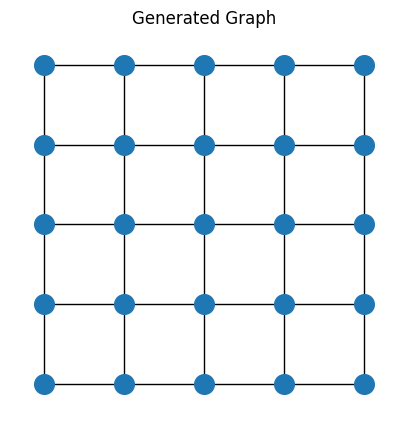

In [112]:
def plot_graph(G, title):
    '''Plot the graph'''
    plt.figure(figsize=(5,5))
    pos = dict((n, n) for n in G.nodes())
    nx.draw_networkx(G, pos=pos, with_labels=False, node_size=200)
    plt.title(title)
    plt.axis('off')
    plt.show()
    
plot_graph(G, 'Generated Graph')

### Minimum spanning tree

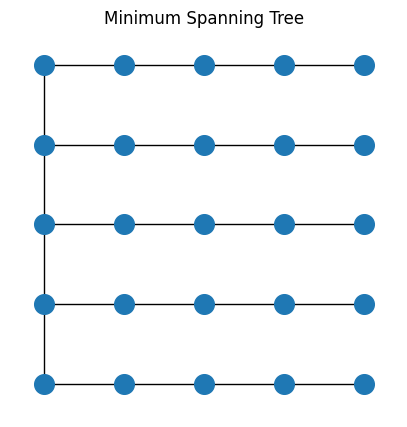

In [113]:
T = nx.minimum_spanning_tree(G)
plot_graph(T, 'Minimum Spanning Tree')

## Delete edges

In [114]:
def delete_random_edges(G, edges_to_delete: int):
        mst = nx.minimum_spanning_tree(G)
        empty_edges = G.edges() - mst.edges()
        
        if edges_to_delete > len(empty_edges) or edges_to_delete < 0:
            raise ValueError('Invalid number of edges to delete')
        
        edges_to_add = len(empty_edges) - edges_to_delete
        
        for i in empty_edges:
            if edges_to_add == 0:
                break
            
            mst.add_edge(i[0], i[1])
            edges_to_add -= 1
            
        return mst  

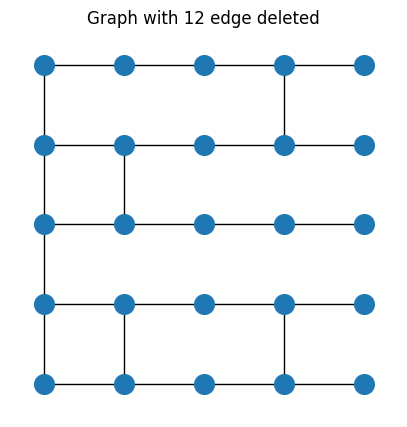

In [115]:
edges_to_delete = 12
mst = delete_random_edges(G, edges_to_delete)
plot_graph(mst, f'Graph with {edges_to_delete} edge deleted')